In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in our data set.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 categorical features in the dataset

Let us have a look at the label 'Loan_Status'. It is a categorcial value. So, lets check its bar plot

<AxesSubplot:>

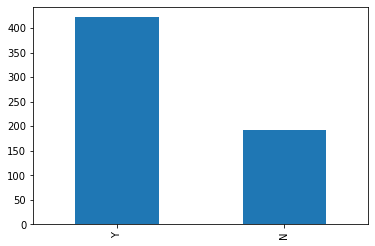

In [8]:
# Visualize frequency using bar plot 
df['Loan_Status'].value_counts().plot.bar()

In [9]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
# Identify Categorical features
numerics=['int8','int16','int32','int64','float16','float32','float64']
numerics_columns=[]
categorical_columns=[]
features = df.columns.values.tolist()

for col in features:
    if df[col].dtype in numerics:
        numerics_columns.append(col)
        continue
    categorical_columns.append(col)

In [20]:
numerics_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Let us visualize the categorical features using bar plot

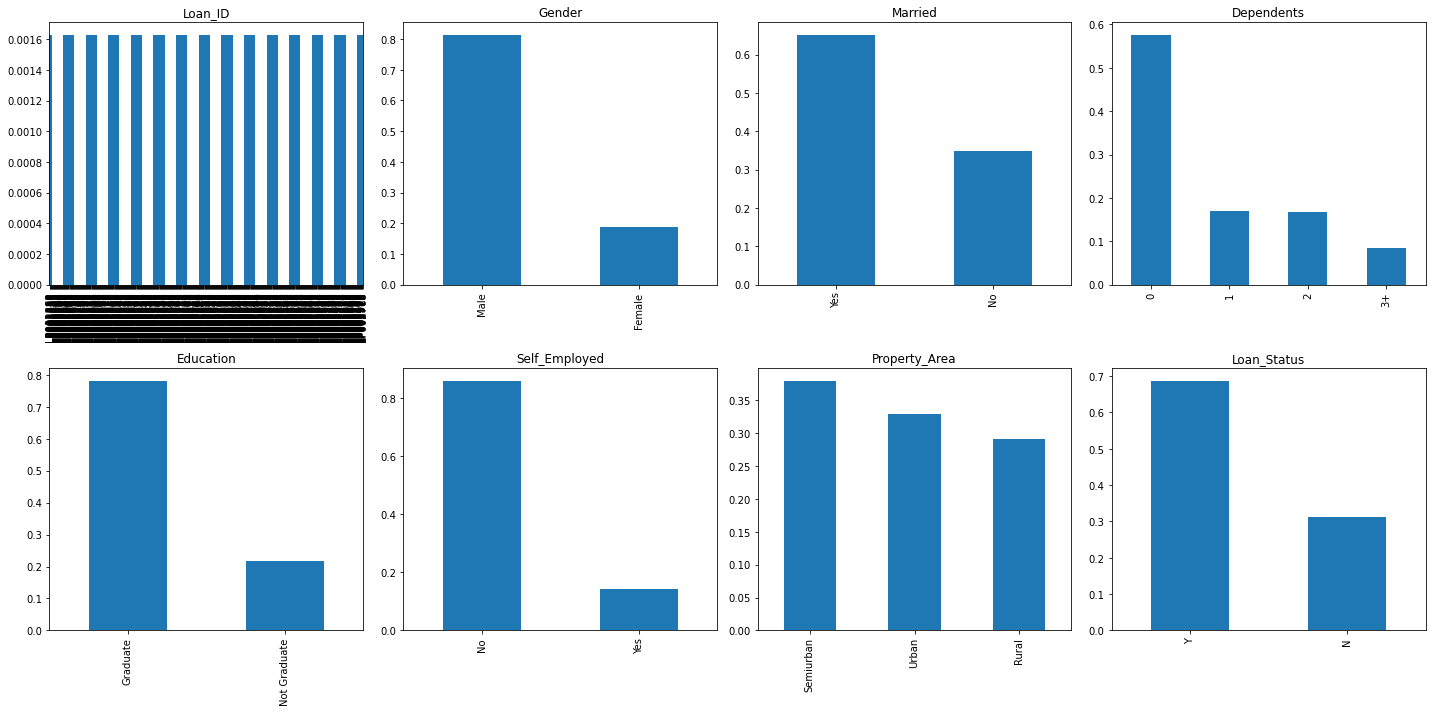

In [18]:
plt.figure(figsize=(20,10))
plotnumber=1
for col in categorical_columns:
    if plotnumber<=8:#we won't print for region as it has categorical values
        ax = plt.subplot(2,4,plotnumber)
        df[col].value_counts(normalize=True).plot.bar(title= col)
    plotnumber+=1
plt.tight_layout()

We can drop loan_id column.In dependent column around 10% has value 3+. We will have to address this and then we can encode the dataset 

Let us look at the distribution plot for numerics columns

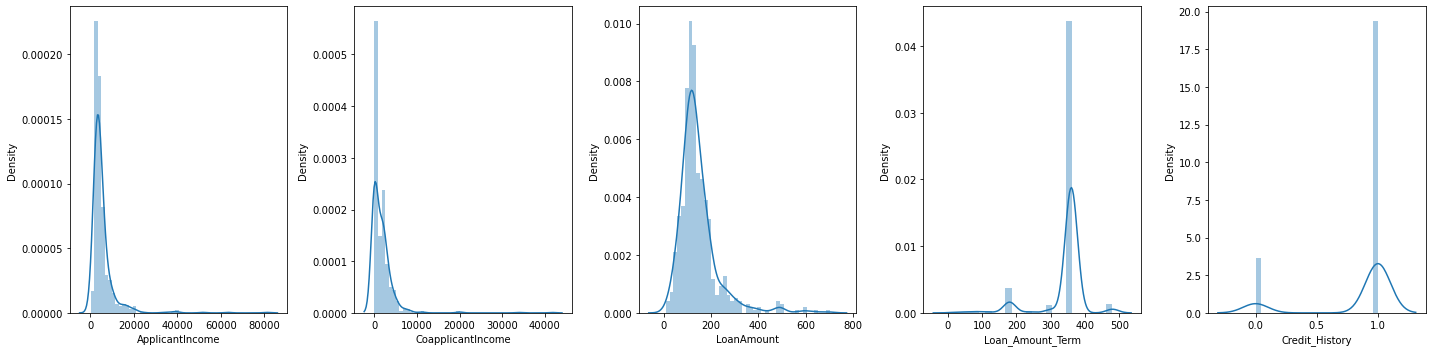

In [22]:
plt.figure(figsize=(20,5))
plotnumber=1
for col in numerics_columns:
    if plotnumber<=8:#we won't print for region as it has categorical values
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The data is not normally distributed. It is right skewed. One possible reason is the need for a higher amount of loan
There are a lot of zero values in co applicant income. Let us club applicant income and coapplicant income as total income to see its relation with the loan aproval

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
#Changing the value '3+' in dependent to 3
df['Dependents'].replace('3+', 3, inplace=True)

In [78]:
# replacing Y and N in Loan_Status, Self Employed and Married variable with 1 and 0 respectively
df['Loan_Status'].replace('Y', 1, inplace=True)
df['Loan_Status'].replace('N', 0, inplace=True)
df['Self_Employed'].replace('Yes', 1, inplace=True)
df['Self_Employed'].replace('No', 0, inplace=True)
df['Married'].replace('Yes', 1, inplace=True)
df['Married'].replace('No', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)
df['Gender'].replace('Female', 0, inplace=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


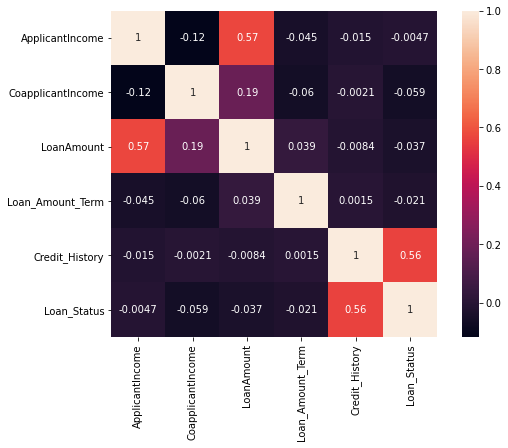

In [35]:
#Plotting the heat map to visualize the corelation
# calculate and visualize correlation matrix
cor_matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cor_matrix, vmax=1, square=True, annot=True)

cor_matrix

In [36]:
#Imputing Missing Values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

for numerics features we will impute mean or median
for categorical features we will impute mode

In [72]:
# replace missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [73]:
# replace missing values with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [74]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier Treatment

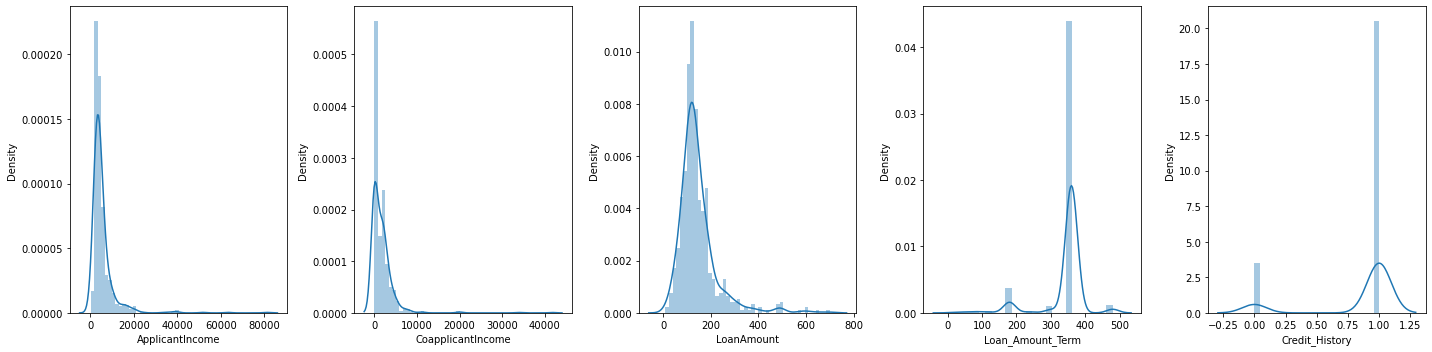

In [42]:
plt.figure(figsize=(20,5))
plotnumber=1
for col in numerics_columns:
    if plotnumber<=8:#we won't print for region as it has categorical values
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

Loan Amount has right skewness. We can do log transofrmation to get a normally distributed data

In [75]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

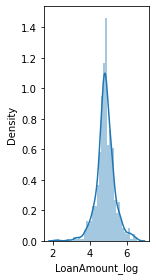

In [52]:
ax=plt.subplot(1,3,3)
sns.distplot(df['LoanAmount_log'])
plt.xlabel('LoanAmount_log')

plt.tight_layout()

# Encoding Categorical Features

In [61]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [62]:
categorical_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [79]:
categorical_columns=['Education','Property_Area']

In [80]:
df1 = pd.get_dummies(df[categorical_columns],drop_first=False)

In [81]:
df1.head(20)

,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,0,1,0,0,1
4,1,0,0,0,1
5,1,0,0,0,1
6,0,1,0,0,1
7,1,0,0,1,0
8,1,0,0,0,1
9,1,0,0,1,0


In [82]:
df=df.join(df1)

In [84]:
df.drop(columns=categorical_columns,axis=1,inplace=True)

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,4.852030,1,0,0,0,1
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,4.852030,1,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,4.189655,1,0,0,0,1
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,4.948760,1,0,0,0,1


# Model Building

In [86]:
# Divide dataset into features and labels
x=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df['Loan_Status']

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=7)

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()

In [90]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred_lr=log_reg.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred_lr)

0.8311688311688312

[[ 24  24]
 [  2 104]]


Text(33.0, 0.5, 'True')

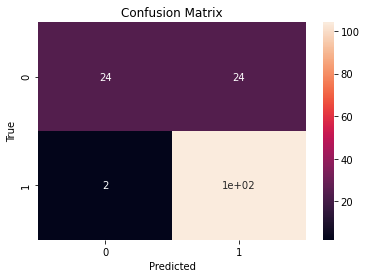

In [93]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
con_mat = confusion_matrix(y_test, y_pred_lr)
print(con_mat)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(con_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Logistic Regression using stratified k-folds cross validation

In [94]:
from sklearn.model_selection import StratifiedKFold

In [101]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(x_scaled, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x_scaled[train_index], x_scaled[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(x_test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8211382113821138

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8110355857656938


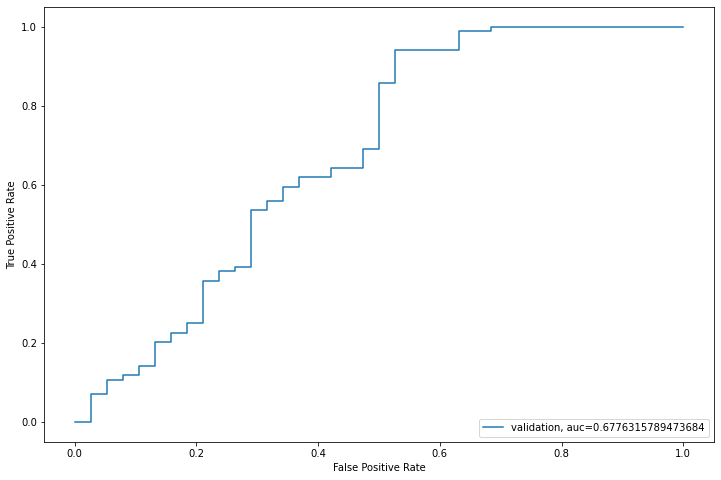

In [102]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Model accuracy is 0.811. Lets try to improve this accuracy using different approaches.

# Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_scaled, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x_scaled[train_index],x_scaled[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(x_test)


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7459016393442623

Mean validation accuracy:  0.7784486205517793


The mean validation accuracy for this model is 0.778 which is less than accuracy of Logistic Regresion

# Decision Tree

In [104]:
from sklearn import tree

In [107]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_scaled,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x_scaled[train_index],x_scaled[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(x_test)


1 of kfold 5
accuracy_score 0.6991869918699187

2 of kfold 5
accuracy_score 0.7317073170731707

3 of kfold 5
accuracy_score 0.7317073170731707

4 of kfold 5
accuracy_score 0.7235772357723578

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy:  0.7116620018659203


The mean validation accuracy for this model is 0.71, which is less than accuracy of Logistic Regression and Random Forest

lets try to improve the accuracy of random forest using grid search CV

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}

In [112]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=3), paramgrid)

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size =0.25, random_state=3)

In [114]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [115]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=3)

In [122]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_scaled,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x_scaled[train_index],x_scaled[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=3, max_depth=1, n_estimators=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(x_test)
pred2=model.predict_proba(x_test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8094228975076636


The mean vaidation accuracy has increased from 0.778 to 0.809

# XGBoost

In [117]:
from xgboost import XGBClassifier

In [123]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x_scaled,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x_scaled[train_index],x_scaled[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model_xgb = XGBClassifier(random_state=1, n_estimators=50, max_depth=1)
    model_xgb.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model_xgb.predict(x_test)
pred3=model_xgb.predict_proba(x_test)[:,1]

# warnings.filterwarnings(action='ignore', category=DeprecationWarning)


1 of kfold 5
[23:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8130081300813008

2 of kfold 5
[23:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8373983739837398

3 of kfold 5
[23:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

The mean validation accuracy is 0.809. There is no significant improvement in accuracy

In [124]:
import pickle
with open ('LoanPrediction.sav','wb') as f:
    pickle.dump(model,f)